In [1]:
import tensorflow as tf
import mask_functions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from TFRecordGenerator import TFRecordGenerator

In [2]:
tfr_filepath = "./data/dataset.tfrecord"
data_dir = "./data"
rle_path = os.path.join(data_dir, "train-rle-sample.csv")

tfr_generator = TFRecordGenerator(data_dir, rle_path)
tfr_generator.write_all_to_tfrecord(tfr_filepath)

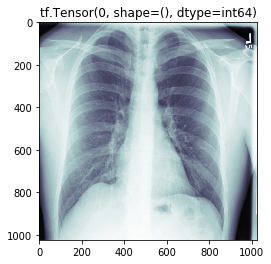

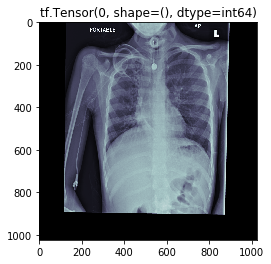

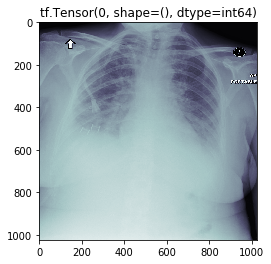

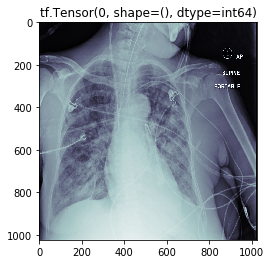

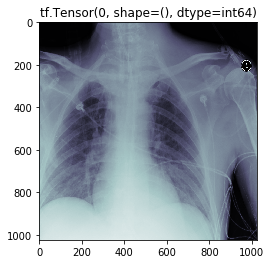

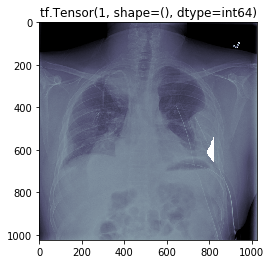

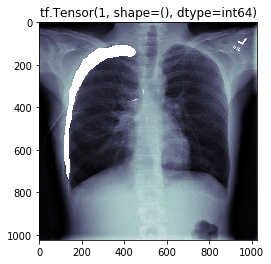

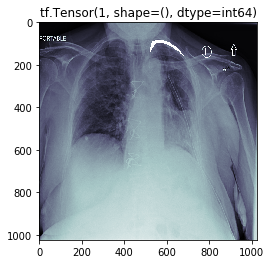

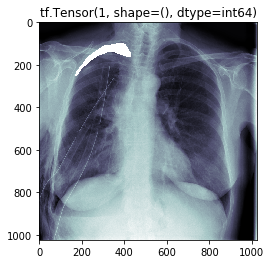

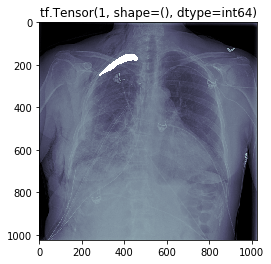

In [53]:
dataset = tf.data.TFRecordDataset([tfr_filepath])
dataset = dataset.map(tfr_generator.decode_function, num_parallel_calls=4)

for img, label, mask in dataset.take(10):
    img_masked = img.numpy().copy()
    img_masked[np.where(mask.numpy()==255.0)] = 255
    plt.figure()
    plt.imshow(img_masked, cmap=plt.cm.bone)
    plt.title(str(label))